------------------------ First pic -----------------------
2*theta1 : 
11.445455246158557
 
Amplitude1 : 
17.50852372867325
 
d1 : 
7.73127647
 
hkl1 : 
[{'hkl': (0, 0, 0, 1), 'multiplicity': 2}]
------------------------ Second pic -----------------------
2*theta2 : 
23.007129883025176
 
intensity2 : 
23.007129883025176
 
d2 : 
3.865638235
 
hkl2 : 
[{'hkl': (0, 0, 0, 2), 'multiplicity': 2}]
------------------------ Third pic -----------------------
2*theta3 : 
24.417000184350666
 
Amplitude3 : 
14.131369141104441
 
d3 : 
3.645532394279032
 
hkl3 : 
[{'hkl': (1, 0, -1, 0), 'multiplicity': 6}]


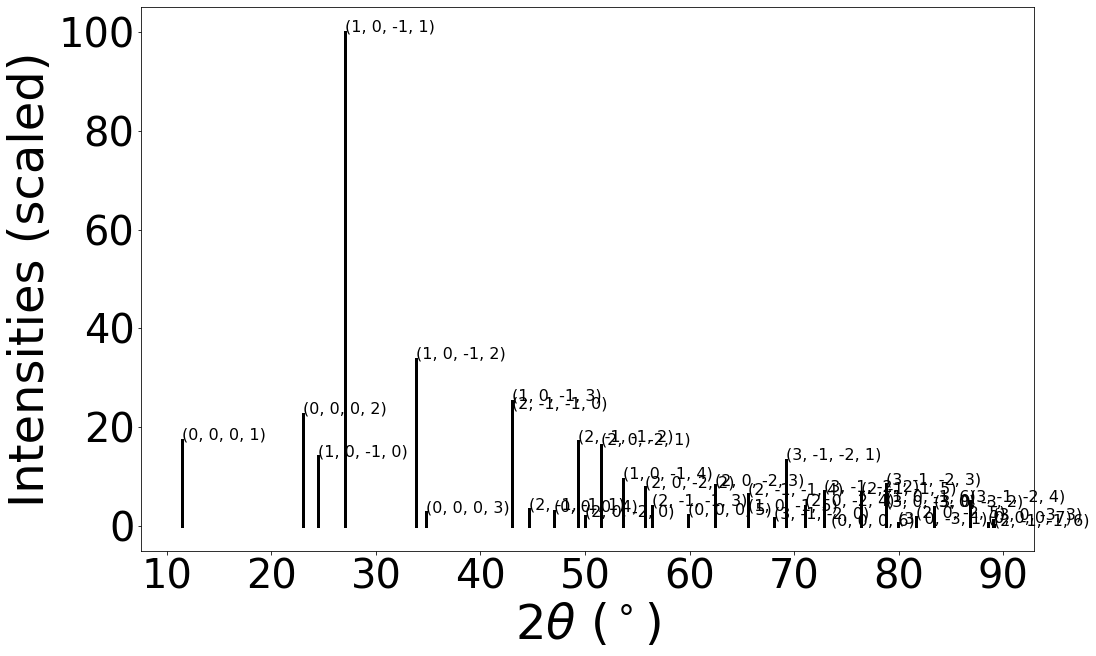

In [35]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import HTML, display
import tabulate
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
with MPRester("ktopgq8J6C3OwUSa") as m:
    structure = m.get_structure_by_material_id("mp-23205")
    w = CifWriter(structure)
    w.write_file('mp23205.cif')
    new_s=SpacegroupAnalyzer(structure).get_primitive_standard_structure()
    
    #Calculateur XRD
    
    xrdcalcu = XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)
    
    xrdcalc = xrdcalcu.get_pattern(structure = structure, scaled=True, two_theta_range=(0, 90))
    xrdcalcu.get_plot(structure)
    
    print("------------------------ First pic -----------------------")
    theta1=(xrdcalc.x)[0]
    print("2*theta1 : ")
    print (theta1)
    print(" ")
    intensite1=(xrdcalc.y)[0]
    print("Amplitude1 : ")
    print (intensite1)
    print(" ")
    d1=(xrdcalc.d_hkls)[0]
    print("d1 : ")
    print (d1)
    print(" ")
    hkl1=(xrdcalc.hkls)[0]
    print("hkl1 : ")
    print (hkl1)

    print("------------------------ Second pic -----------------------")
    theta2=(xrdcalc.x)[1]
    print("2*theta2 : ")
    print(theta2)
    print(" ")
    intensite2=(xrdcalc.x)[1]
    print("intensity2 : ")
    print(intensite2)
    print(" ")
    d2=(xrdcalc.d_hkls)[1]
    print("d2 : ")
    print (d2)
    print(" ")
    hkl2=(xrdcalc.hkls)[1]
    print("hkl2 : ")
    print(hkl2)

    print("------------------------ Third pic -----------------------")
    theta3=(xrdcalc.x)[2]
    print("2*theta3 : ")
    print (theta3)
    print(" ")
    intensite3=(xrdcalc.y)[2]
    print("Amplitude3 : ")
    print(intensite3)
    print(" ")
    d3=(xrdcalc.d_hkls)[2]
    print("d3 : ")
    print (d3)
    print(" ")
    hkl3=(xrdcalc.hkls)[2]
    print("hkl3 : ")
    print(hkl3)
    

In [36]:
print("Diffractogramme du MgI2 pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.")
print("Les valeurs obtenues sont bien vérifiées par celles de Materials Project.")

Diffractogramme du MgI2 pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.
Les valeurs obtenues sont bien vérifiées par celles de Materials Project.


------------------------ First pic -----------------------


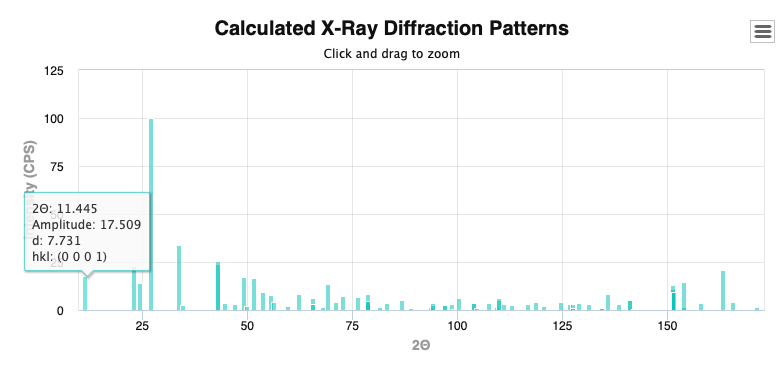

In [37]:
print("------------------------ First pic -----------------------")
Image(filename='Pic1.png')

------------------------ Second pic -----------------------


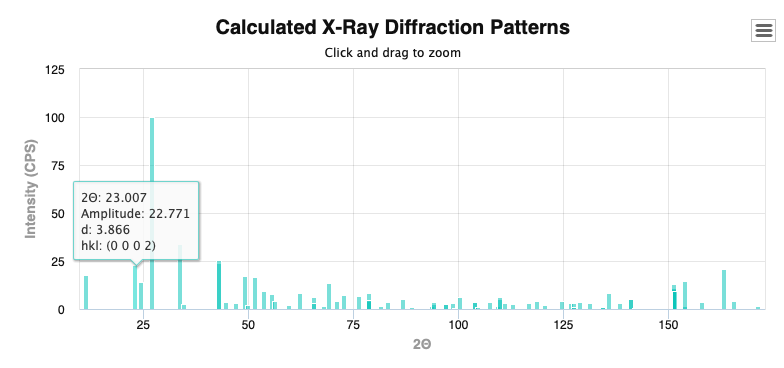

In [38]:
print("------------------------ Second pic -----------------------")
Image(filename='Pic2.png')

------------------------ Third pic -----------------------


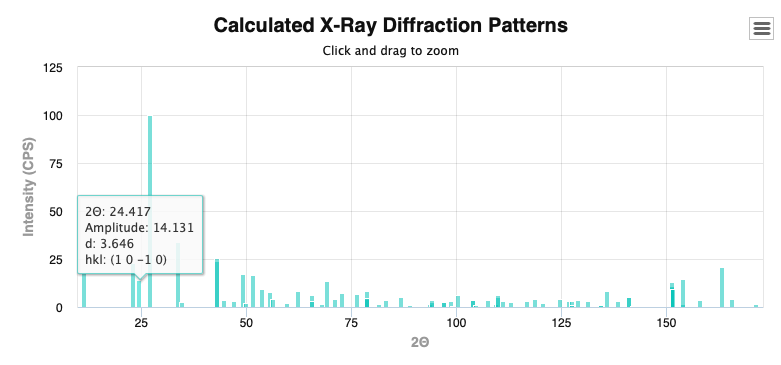

In [39]:
print("------------------------ Third pic -----------------------")
Image(filename='Pic3.png')